# Курсовая работа. Блок ML Beginner
<br>

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [139]:
#Загрузим все необходимые библиотеки и модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# , category=FutureWarning

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer,\
                                  LabelEncoder, QuantileTransformer, MinMaxScaler,\
                                  Normalizer, StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,\
                            confusion_matrix, classification_report, plot_confusion_matrix,\
                            fbeta_score, balanced_accuracy_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn import set_config
set_config(display='diagram')   

# 1. Описание данных

In [34]:
### Загружаем наши данные ###
source_df = pd.read_csv('telecom_users.csv')

# Для EDA сделаем копию датафрейма и с ней будем работать. 
# Делаю так потому, что в пайплайн моделей будут подаваться данные в исходном виде.
# А весь препроцессинг, генерация новых признаков и т.д. будет происходить уже внутри.
eda_df = source_df.copy()

# Сразу уберём столбцы Unnamed: 0  и customerID, они нам для EDA не нужны.
eda_df = source_df.drop(['Unnamed: 0','customerID'], axis=1, errors='ignore')

# Посмотрим на датасет и на типы данных по столбцам
eda_df.info()
eda_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [35]:
# У нас 3 столбца с количественными признаками: tenure, MonthlyCharges, TotalCharges
# Остальные признаки, включая целевой - категориальные

# Приведём сразу все столбцы к нужным типам, чтобы удобнее было дальше с ними работать.

# Создадим списки числовых и категориальных признаков.
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = [name for name in eda_df.columns.to_list() if name not in numerical_features]
print(f'numerical_features: {numerical_features}')
print(f'categorical_features: {categorical_features}')

# Приведем категориальные признаки к нужному типу данных.
eda_df[categorical_features] = eda_df[categorical_features].astype('category')

# TotalCharges по какой-то причине(дальше с этим разберемся) имеет тип object.
# Приведём его к числовому типу.
eda_df['TotalCharges'] = pd.to_numeric(eda_df['TotalCharges'], errors='coerce')
eda_df[numerical_features] = eda_df[numerical_features].astype('float')

# Теперь у нас все признаки приведены к нужным типам. Можно дальше исследовать данные.
eda_df.dtypes

numerical_features: ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [36]:
# Проверим на наличие пропущенных значений
print(source_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [37]:
# В столбце TotalCharges есть пропущенные значения, посмотрим на эти строки внимательнее
eda_df[eda_df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


**У всех 10 пользователей tenure = 0 , значит они еще ни разу вносили плату. <br>В таком случае можно заполнить пропущенные значения нулями.**

In [38]:
# Заполняем нулями пропущенные значения.
eda_df['TotalCharges'].fillna(0, inplace=True)
print('Пропущенных значений в TotalCharges: ', eda_df['TotalCharges'].isna().sum(), sep='')

Пропущенных значений в TotalCharges: 0


**Посмотрим сначала на наши числовые данные. Это признаки tenure, MontlyCharges и TotalCharges**

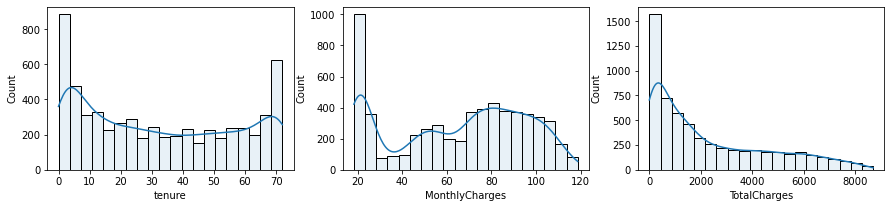

In [39]:
fig, ax = plt.subplots(1,3, figsize=(15,3))
counter = 0
for name in eda_df[['tenure', 'MonthlyCharges', 'TotalCharges']]:
    sns.histplot(eda_df[name],kde=True, bins=20, ax=ax[counter], label=name, alpha=0.1)
    counter+=1

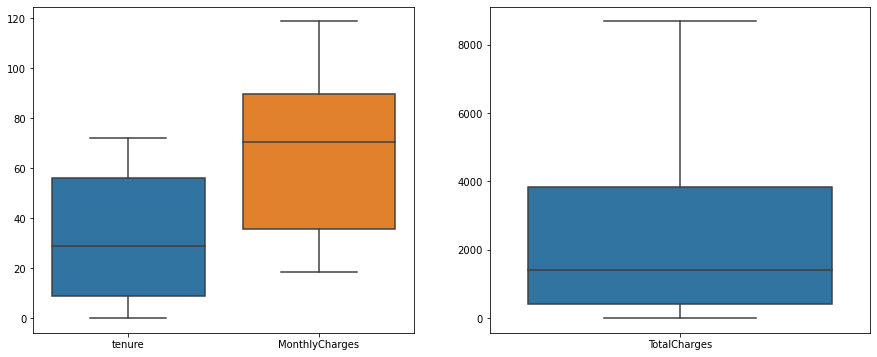

In [40]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=eda_df[['tenure','MonthlyCharges']], ax=ax[0])
sns.boxplot(data=eda_df['TotalCharges'], ax=ax[1])
ax[1].set_xticklabels(["TotalCharges"])
plt.show()

***Ни одна из величин не распределена нормально, похоже что у tenure бимодальное распределение. У TotalCharges очевидная асимметрия с длинным "хвостом" справа. Но выбросов(outliers) нет, и это уже неплохо.<br><br> Нужно будет стандартизировать или нормализовать данные, попробуем несколько вариантов.***

**Теперь посмотрим на оставшиеся категориальные признаки.**

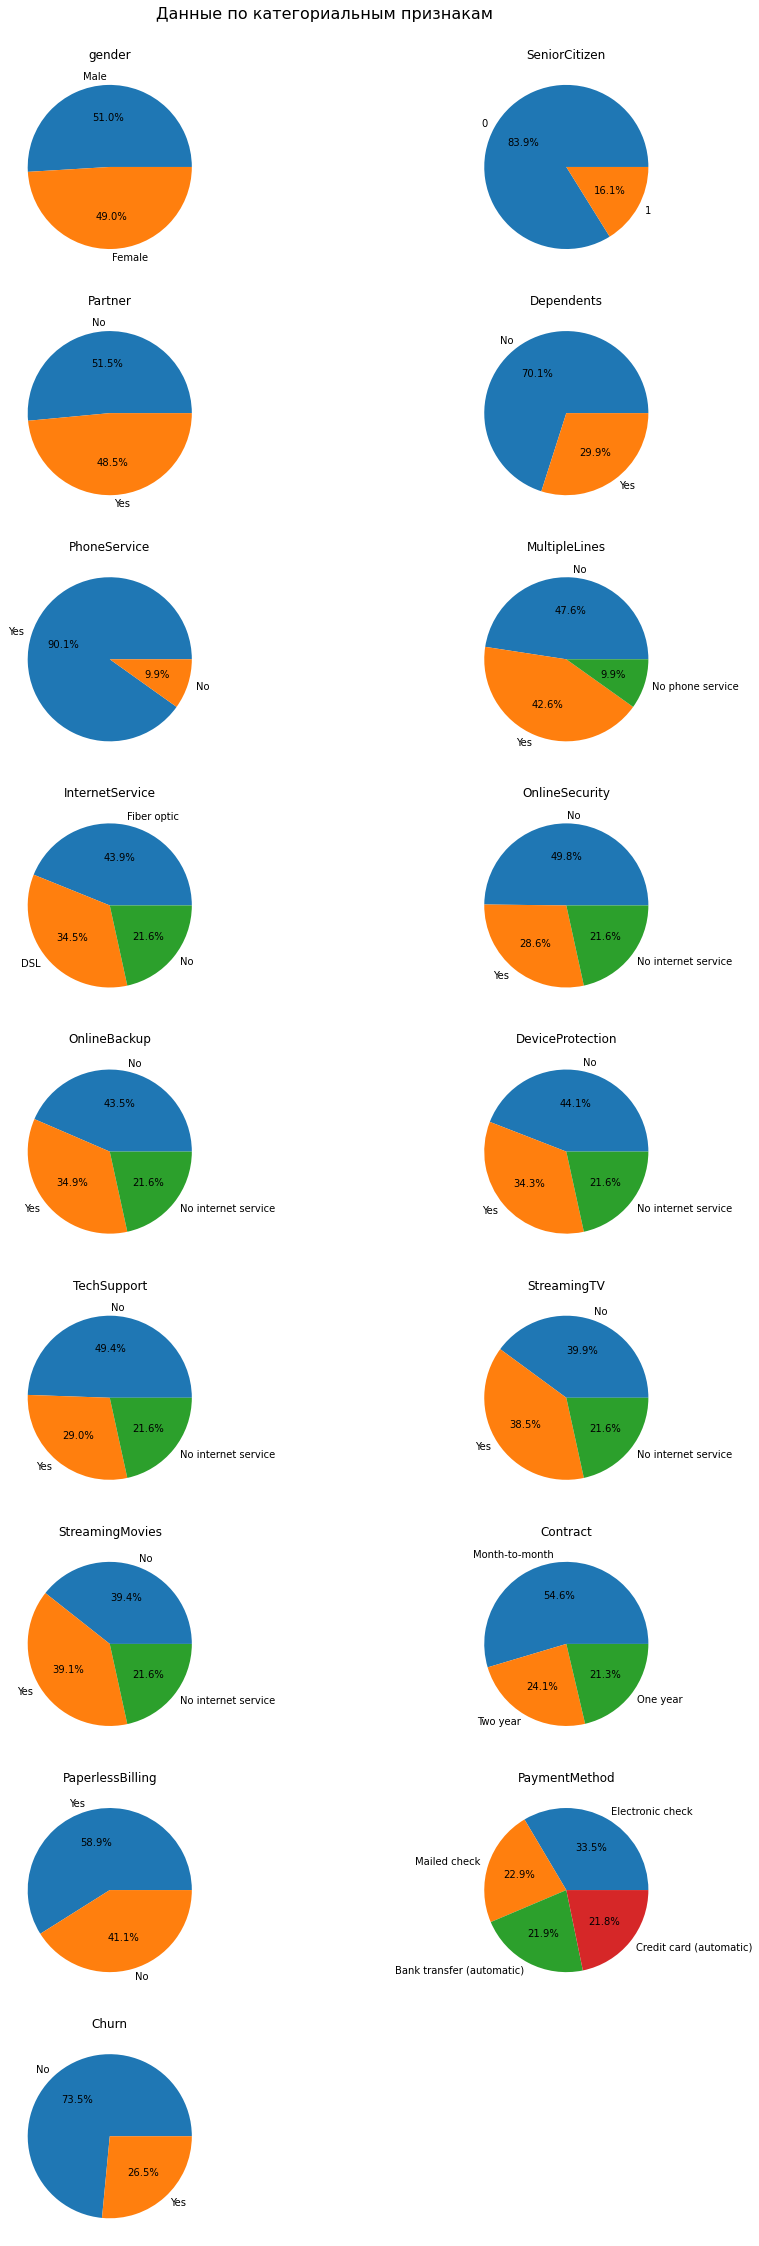

In [41]:
fig, ax = plt.subplots(9,2, figsize=(15,40))
counter = 0
for i in range(9):
    for j in range(2):
        df_temp=eda_df[categorical_features[counter]].value_counts()
        ax[i,j].pie(df_temp, autopct='%.1f%%', labels=df_temp.index)
        ax[i,j].set_title(categorical_features[counter])
        counter += 1
        if counter > 16:
            break
ax[8,1].remove()
plt.suptitle('Данные по категориальным признакам', x=.5,y=.9, fontsize=16);

Глядя на эти данные можно сразу сделать несколько выводов.

1. Датасет не сбалансирован. Чуть больше четверти клиентов ушли в "отток". Это нужно будет учитвать при разбивке на тренировочную и тестовую части, а также при кросс-валидации. Необходимо будет использовать стратифицированную выборку. Я также попробую разные варианты овер- и андерсемплинга для балансировки датасета.
2. У признаков PhoneService и MultipleLines дублируется категория No phone service. Такая же картина наблюдается с признаками No internet service в признаках различных сервисов. Возможно есть смысл отдельно вытащить бинарный столбец с информацией о наличии-отсутствии интернета. Так же как сейчас у признака PhoneService.

# 2. Исследование зависимостей и формулирование гипотез

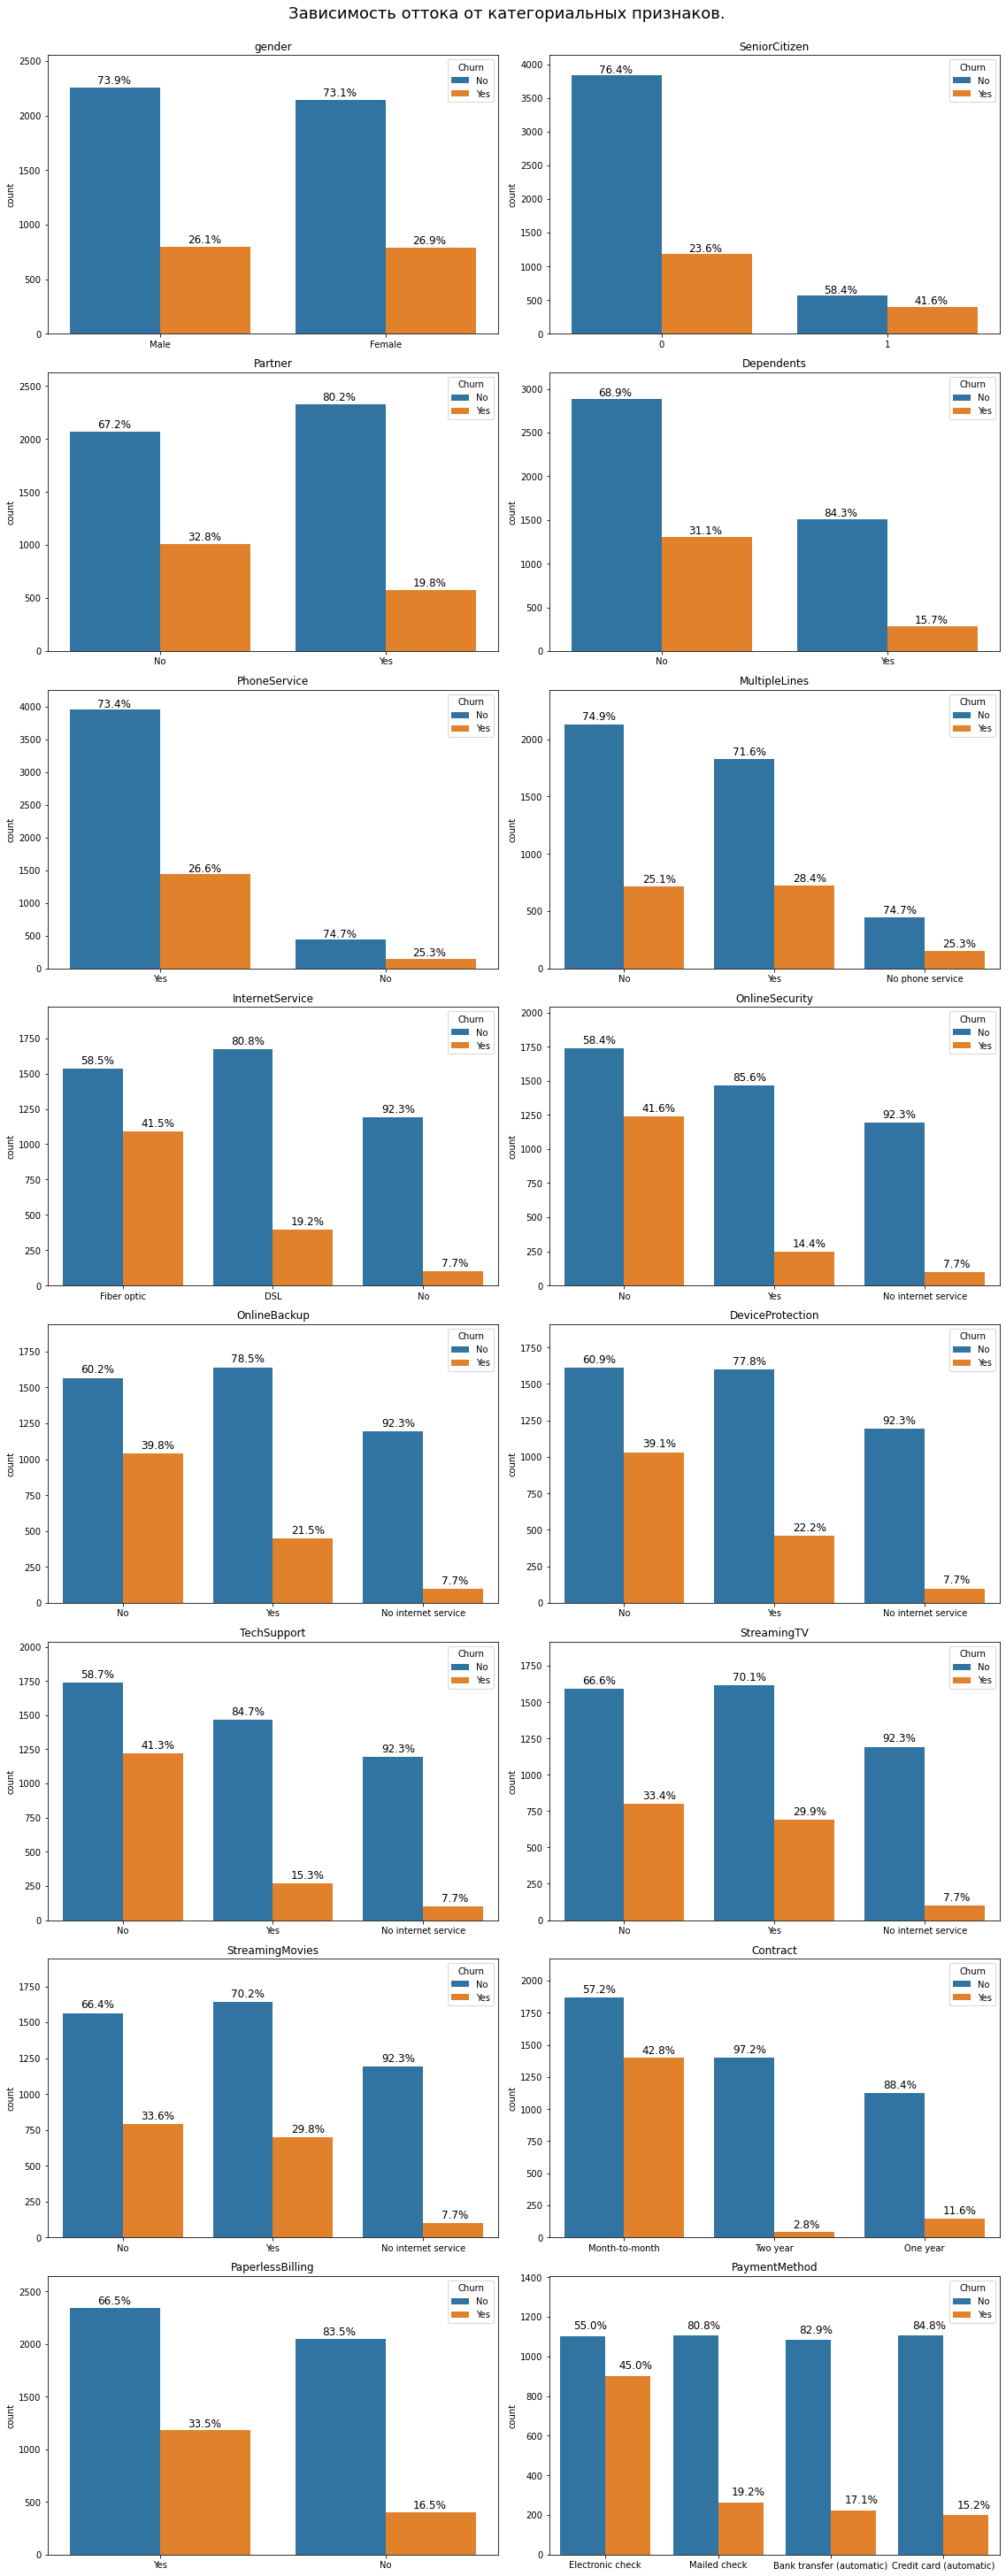

In [42]:
# Сначала посмотрим на зависимость оттока от категориальных признаков.
fig, ax = plt.subplots(8, 2, figsize=(16,40))

counter = 0
for i in range(8):
    for j in range(2):
        sns.countplot(data=eda_df, x=categorical_features[counter], hue='Churn',
                      order=eda_df[categorical_features[counter]].value_counts().sort_values(ascending=False).index,
                      ax=ax[i,j])
        
        heights = [p.get_height() for p in ax[i,j].patches]
        patch = [p for p in ax[i,j].patches]
        num_cat = eda_df[categorical_features[counter]].nunique()
        
        for n in range(num_cat):
            total = eda_df[categorical_features[counter]].value_counts().values[n]
            for m in range(2):
                percentage = '{:.1f}%'.format(100*heights[(m*num_cat + n)]/total)
                x = patch[(m*num_cat + n)].get_x() + patch[(m*num_cat + n)].get_width() / 2 - 0.08
                y = patch[(m*num_cat + n)].get_y() + patch[(m*num_cat + n)].get_height()+35
                ax[i,j].annotate(percentage, (x,y), size=12)
        
        ax[i,j].set_title(ax[i,j].get_xlabel())
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylim(0,max(heights)+300)
        counter += 1
plt.tight_layout()
plt.suptitle('Зависимость оттока от категориальных признаков.', y=1.01, fontsize=18)
plt.show()

Выводы:
1. Пол (gender): и среди мужчин, и среди женщин одинаковый процент пользователей уходит в "отток". Вероятно этот признак не даст никакой информации для моделей.
2. Пенсионеры(SeniorCitizen): Само респределение между пенсионерами и не пенсионерами сильно перекошено в сторону вторых. Но при этом среди пенсионеров почти вдвое выше процент ушедших в "отток"
3. Состоит ли в браке (partner): Вполне ожидаемо, что среди людей, состоящих в браке, процент оттока существенно ниже.
4. Есть ли иждивенцы(Dependents): Тут тоже вполне ожидаемо, что у клиентов с иждивенцами процент оттока существенно ниже. Когда у людей есть определённые обязательства, они вероятно предпочитают стабильность поиску новых вариантов.
5. Есть ли телефонная связь(PhoneService): Процент оттока одинаковый среди обоих типов клиентов. Похоже это вообще не влияет на вероятность "оттока"
6. Несколько телефонных линий(MultipleLines): Среди тех клиентов, у кого есть телефонная связь, процент оттока очень близкий и среди клиентов использующих одну телефонную линию и среди тех, кто использует только одну линию.
7. Тип интернета(InternetService): Самый низкий процент оттока среди тех клиентов, которы не пользуются интернетом вообще. А вот среди тех, кто пользуется - у клиентов на "оптоволокне" процент оттока значительно выше, чем у клиентов с ADSL.
8. Дополнительные сервисы, большая часть (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport): Картина для всех сервисов похожая. Самый большой процент оттока у тех клиентов, у которых интернет подключён, но они по каким-то причинам конкретным сервисом не пользуются. Среди тех, у кого вообще услуги интернета не подключено - процент оттока значительно меньше.
9. Дополнительные сервисы, стриминговые услуги(StreamingTV, StreamingMovies): Тут довольно похожий процент оттока, середи тех кто пользуется сервисом, и среди тех, кто не пользуется.
10. Тип контракта(Contract): Всё также вполне ожидаемо, что наибольший процент оттока, среди тех клиентов, кто оплачивает услуги помесячно. Туда явно входят и новые клиенты. И конечно среди тех, кто сразу на долгое время контракт подписал отток существенно меньше. Причем с увеличением срока контракта - процент оттока уменьшается.
11. Услуга безбумажного биллинга(PaperlessBilling): Процент оттока вдвое выше среди тех, кто пользуется этой услугой. Возможно стоит проверить сколько SeniorCitizen пользуется этой услугой.
12. Метод оплаты(PaymentMethod): Процент оттока существенно выше среди тех, кто осуществляет оплату электронным чеком. Остальные категории имеют довольно близки процент оттока.

**Теперь с посмотрим на зависимости оттока от числовых признаков**<br>Тут еще сразу сразу можно проверить зависят ли как-нибудь MonthlyCharges и Tenure от TotalCharges.

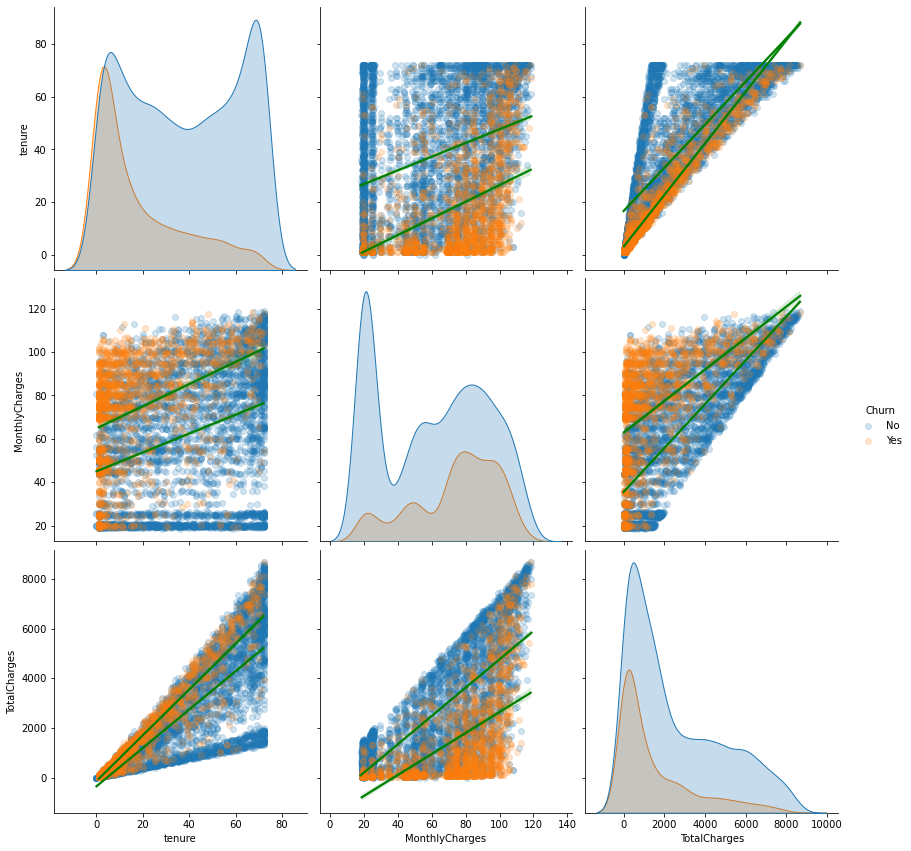

In [43]:
name_list = ['tenure','MonthlyCharges','TotalCharges', 'Churn']
sns.pairplot(eda_df[name_list], hue='Churn', kind='reg', diag_kind='kde',
             plot_kws={'scatter_kws':{'alpha':0.2},'line_kws':{'color':'green'}}, height=4);

1. Зависимость оттока от tenure, MonthlyCharges, TotalCharges - нелинейная. Можно попробовать сделать разбивку tenure с интервалом, например в год, и тогда для каждого интервала зависимость будет ближе к линейной. Возможно это улучшит результаты для линейных моделей. (Во всяком случае на kaggle рекомендуют попробовать и проверить)
2. Очевидно есть корреляция между парами (tenure,MonthlyCharges) и (tenure, TotalCharges) 

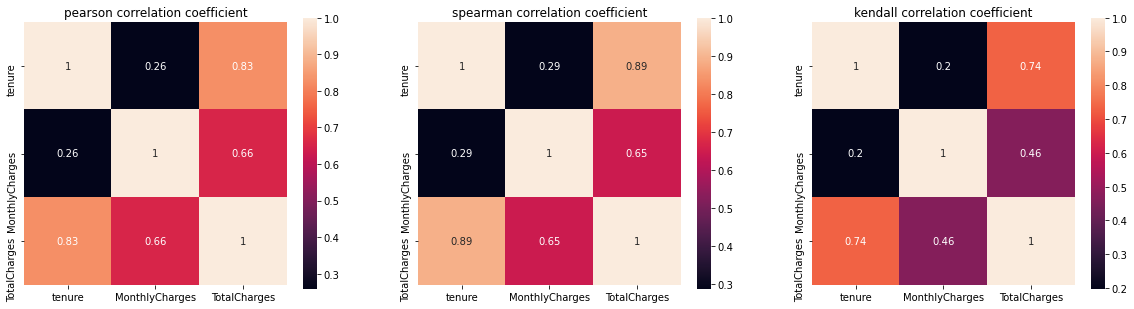

In [44]:
# Посмотрим на корреляцию этих признаков.
name_list = ['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(20,5))
for num,name in enumerate(['pearson','spearman','kendall']):
    ax = plt.subplot(1,3,num+1)
    sns.heatmap(eda_df[name_list].corr(method=name), annot=True, square=True, ax=ax)
    plt.title(name+' correlation coefficient')

**TotalCharges заметно(по шкале Чеддока) коррелирует с MonthlyCharges и tenure. Логично было бы предположить, что это вообще произведение количества месяцев в компании на месячный платеж, с мелкими отклонениями(изменение месячного платежа при смене тарифа например)**

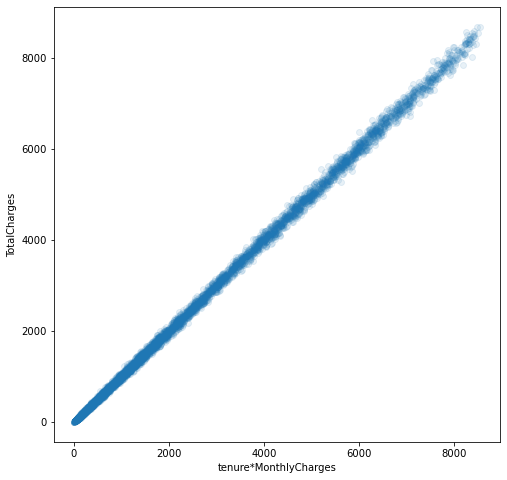

pearson correlation coefficient: 0.9995643539776095
spearman correlation coefficient: 0.9996140472152428
kendall correlation coefficient: 0.9833018750095304


In [45]:
plt.figure(figsize=(8,8))
plt.scatter(eda_df['tenure']*eda_df['MonthlyCharges'],eda_df['TotalCharges'], alpha=0.1)
plt.ylabel('TotalCharges')
plt.xlabel('tenure*MonthlyCharges')
plt.show()
for name in ['pearson','spearman','kendall']:
    print(f'{name} correlation coefficient: {eda_df["TotalCharges"].corr(eda_df["tenure"]*eda_df["MonthlyCharges"],method=name)}')

Ну в общем да, коэффициент корреляции почти единица. Конечно TotalCharges это не прямое произведение tenure и MonthlyCharges, есть небольшая вариативность.<br><br>Нельзя однозначно сказать, что TotalCharges не несёт никакой дополнительной информации.<br><br> Возможно есть смысл этот признак убрать, при обучении линейных моделей. Чтобы избежать мультиколлинеарности. <br> Хотя после нормализации он может быть и не будет оказывать сильного негативного эффекта на линейные модели. Попробуем проверить при подборе параметров для моделей.

**Попробуем нагенерить дополнительные признаки, учитывая информацию полученную при исследовании данных.**

Основных идей три:
1. Посчитать общее количество сервисов, которыми пользуется клиент и посмотреть на зависимость оттока от этого количества.
2. Вытащить признак наличия или отсутствия интернета отдельно, так чтобы он бинарный был. И проверить зависимость оттока от него.
3. Разбить tenure на интервалы по 1 году. Общая зависимость будет очевидно такая же, как без разбиения. Но для каждого интервала зависимость может стать ближе к линейной.

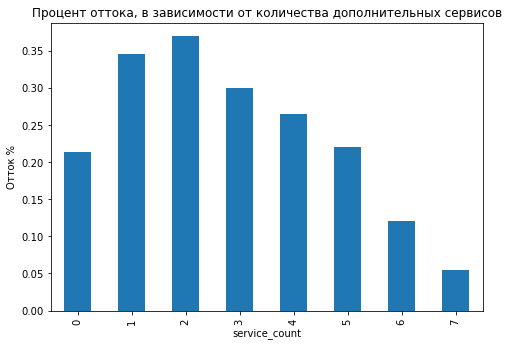

In [46]:
# Запишем в отдельный столбец количество используемых сервисов.

service_list = ['MultipleLines','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']


eda_df['service_count'] = eda_df[service_list]\
                              .applymap(lambda x: 0 if x in ('No phone service', 'No internet service','No') else 1)\
                              .sum(axis=1)


eda_df.groupby('service_count')['Churn'].value_counts(normalize=True).unstack()['Yes'].plot(kind='bar',
                                                                                            ax = plt.axes((0,0,1,1)))
plt.ylabel('Отток %')
plt.title('Процент оттока, в зависимости от количества дополнительных сервисов')
plt.show()

Зависимость от количества используемых сервисов есть, и она нелинейная. Самый большой процент оттока у пользователей, подключивших 2 дополнительных сервиса. После 2 с увеличением числа сервисов - процент оттока уменьшается.

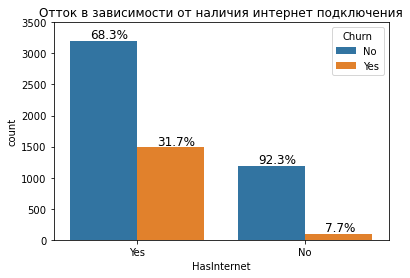

In [47]:
# Запишем в отдельный столбец наличие или отсутствие интернет подключения.
eda_df['HasInternet'] = (eda_df['InternetService'] != 'No').astype('int')
ax = sns.countplot(data=eda_df, x='HasInternet', hue='Churn',order=eda_df['HasInternet'].value_counts().sort_values(ascending=False).index)
heights = [p.get_height() for p in ax.patches]
patch = [p for p in ax.patches]
num_cat = 2

for n in range(num_cat):
    total = eda_df['HasInternet'].value_counts().values[n]
    for m in range(2):
        percentage = '{:.1f}%'.format(100*heights[(m*num_cat + n)]/total)
        x = patch[(m*num_cat + n)].get_x() + patch[(m*num_cat + n)].get_width() / 2 - 0.08
        y = patch[(m*num_cat + n)].get_y() + patch[(m*num_cat + n)].get_height()+35
        ax.annotate(percentage, (x,y), size=12)
ax.set_ylim(0,3500)
ax.set_xticklabels(['Yes','No'])
ax.set_title('Отток в зависимости от наличия интернет подключения')
plt.show()

Зависимость явная, процент оттока среди пользователей, у которых есть интернет в 4 раза превышает процент оттока среди тех пользователей, у которых интернета нет. 

In [48]:
# Разобьем tenure на интервалы по 12 месяцев и запишем в отдельный столбец tenure_bin
eda_df['tenure_bin'] = pd.cut(eda_df['tenure'], bins=[-1,12,24,36,48,60,72], labels=[0,1,2,3,4,5], right=True)

# Переиндексируем столбцы , для удобства, так, чтобы у нас Churn, последним оказался.
churn = eda_df['Churn']
eda_df =  pd.concat([eda_df.drop('Churn', axis=1), churn], axis=1)
eda_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,service_count,HasInternet,tenure_bin,Churn
0,Male,0,Yes,Yes,72.0,Yes,Yes,No,No internet service,No internet service,...,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,1,0,5,No
1,Female,0,No,No,44.0,Yes,No,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,3,1,3,No
2,Female,1,Yes,No,38.0,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1,1,3,Yes
3,Male,0,No,No,4.0,Yes,No,DSL,No,No,...,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,1,1,0,No
4,Male,0,No,No,2.0,Yes,No,DSL,Yes,No,...,No,Month-to-month,No,Electronic check,53.45,119.50,2,1,0,No


**Попробуем теперь посмотреть, на взаимосвязь признаков с целевой переменной, но уже используя метрики.**

- Можно было бы посчитать корреляцию каждого признака с целевым, но дело в том, что корреляция может показать лишь линейную зависмость.
- К счастью есть еще метрика взаимной информации(Mutual Information). Она довольно много преимуществ имеет, одно из которых  - работа с любыми зависимостями(как линейными, так и нелинейными).

In [50]:
# Чтобы MutualInfo посчитать, сначалай прийдётся всё перевести в числовой формат
cat_list = eda_df.select_dtypes(['category']).columns.to_list()

In [51]:
eda_df[cat_list] = eda_df[cat_list].apply(lambda x: x.factorize()[0], axis = 0)

In [52]:
# Воспользуемся функцией mutual_info_classif из библиотеки sklearn. 
# Она считает mutual information для категориальной целевой переменной.

X_mi = eda_df.drop('Churn', axis=1)
y_mi = eda_df.Churn

# Для точного расчета в функцию нужно передать список столбцов (точнее список булевых значений (True, False)),
# значения которых являются дискретными. Tenure у нас тоже дискретный, так что его тип поменяем на integer.
eda_df['tenure'] = eda_df['tenure'].astype('int')
discr_features = [pd.api.types.is_integer_dtype(t) for t in X_mi.dtypes]

scores = mutual_info_classif(X_mi, y_mi, discrete_features=discr_features, random_state=0)
scores_df = pd.Series(scores, name='MI scores', index=X_mi.columns)
print(scores_df.sort_values(ascending=False))

Contract            0.097921
tenure              0.076608
tenure_bin          0.064518
OnlineSecurity      0.063917
TechSupport         0.060610
InternetService     0.053157
MonthlyCharges      0.050225
TotalCharges        0.045544
OnlineBackup        0.045500
PaymentMethod       0.043067
DeviceProtection    0.043023
StreamingMovies     0.030816
StreamingTV         0.030717
HasInternet         0.030141
PaperlessBilling    0.018599
service_count       0.017128
Dependents          0.013740
Partner             0.010901
SeniorCitizen       0.010465
MultipleLines       0.000659
gender              0.000046
PhoneService        0.000045
Name: MI scores, dtype: float64


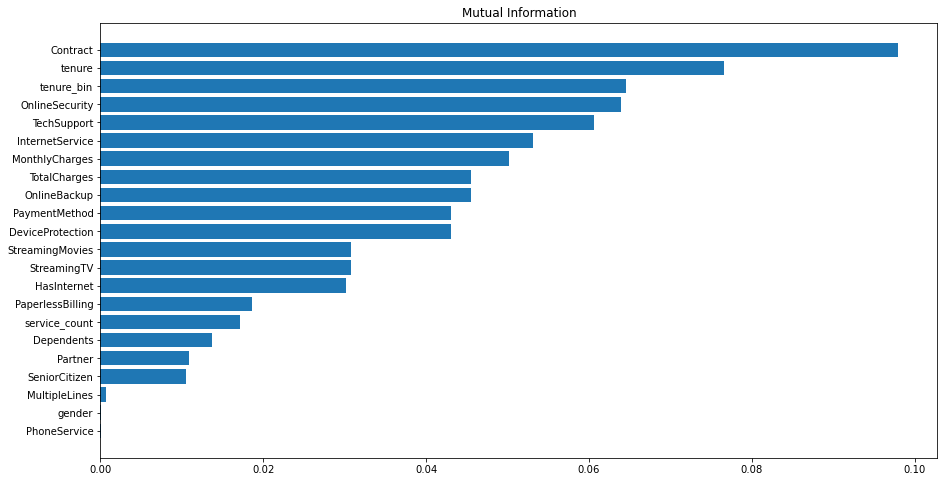

In [53]:
plt.figure(figsize=(15,8))

sorted_scores = scores_df.sort_values(ascending=True)
width = np.arange(len(sorted_scores))
ticks = list(sorted_scores.index)
plt.barh(width,sorted_scores)
plt.yticks(width,ticks)
plt.title("Mutual Information")
plt.show()

**Выводы**
- Признаков с нулевыми оценками нет. Это значит, что и gender и PhoneService могут нести информацию, полезную для построения моделей. Хотя они могут и просто лишний шум привносить.
- Новые сгенерированные признаки(если не брать разбивку на годовые интервалы) - не особо много информации в себе несут. Может быть они и не дадут прироста точности для моделей. Но всё же они лучше чем те же gender или PhoneService объясняют поведение целевой переменной.
- Попробуем на основании этой информации понизить размерность, при простроении моделей. Попробуем оставить разное количество признаков.

# 3. Построение моделей для прогнозирования оттока

**Важно, о метриках:**
- Общая задача - классификация
- Затраты на привлечение нового клиента всегда выше, чем затраты на удержание уже существующего. Поэтому в данном случае для нас очень важно получить как можно меньше ложноотрицательных(False negative) предсказаний. А это значит, что нужно ориентироваться на максимизацию метрики полноты (recall).
- Но при этом нужно еще и не провалиться по точности(precision). Иначе будут потрачены средства для удержания тех клиентов, которые и так уходить не собирались. 
- Удобно оценивать модели по roc-auc. Если на выходе получать вероятности отнесения к тому или иному классу - пороговое значение можно настраивать самому.
- Думаю надо оценивать модели в первую очередь по Roc-auc, при максимальном Recall и при этом чтобы precision был ну хотя бы выше 0.5. Иначе это примерно как монетку подбрасывать.

### Почему именно пайплайны.
1. Хотелось разобраться как они работают.
2. Позволяют объединить препроцессинг и саму модель.
3. Страхуют от ошибок при препроцессинге и сэмплинге, применяя нужные трансформации только к нужным частям датасета. Например: стандартизация или нормализация - обучаются на трэйн-сете, и трансформируют тестовые данные на основании обучения. Или сэмплинг - SMOTE, SMOTEENN и т.д. в пайплайне применяются только к тренировочной части сета для обучения. Страхуя от ошибочного семплирования тестовых данных, что обычно приводит к data leakage.
4. Можно сохранить и выгрузить готовую модель, в которую на вход можно подавать необработанные или минимально обработанные данные. То есть не требуется писать какую то большую дополнительную "обвязку" для дальнейшей работы с моделью.

**"Отправная точка"**
- Для того, чтобы от чего-то отталкиваться и понимать удалось ли улучшить модели, нам нужна какая-то отправная точка, Baseline.
- Будем использовать 7 моделей: Логистическую регрессию, К-ближайших соседей, Решающие деревья, Случайный лес, Метод опорных векторов(попробуем разные функции ядра), Наивный Байесовский классификатор, Градиентный бустинг.
- Объединим все модели стэкингом, для этого будем использовать StackingClassifier из sklearn
- Посчитаем метрики для базовых моделей.
    - Поскольку датасет несбалансирован, а для нас еще и recall очень важен, будем использовать следующие метрики: balanced accuracy, precision, recall, fbeta(с коэффициентом 2), roc-auc.

In [54]:
# Вспомогательные функции и классы.

# Функция для удобного представления оценок моделей
def model_score(model, X_test, y_test):
    name = ''
    scores = {}
    scores['balanced_accuracy'] = balanced_accuracy_score(y_test, model.predict(X_test))
    scores['precision'] = precision_score(y_test, model.predict(X_test))
    scores['recall'] = recall_score(y_test, model.predict(X_test))
    scores['fbeta'] = fbeta_score(y_test, model.predict(X_test), beta=2)
    if hasattr(model,'predict_proba'):
        scores['ROC_AUC'] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    else:
        scores['ROC_AUC'] = roc_auc_score(y_test, model.decision_function(X_test))
    if str(model).split('(')[0] == 'StackingClassifier':
        name = 'StackingClassifier'
    else:
        name = str(model.get_params()['steps'][-1][1]).split('(')[0]
    return pd.DataFrame(scores, index=[name])

# Классы для трансформации исходных данных.

# Наличие или отсутствие интернет подключения.
class HasInternetTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        X_.hasInternet = (X_['InternetService'] != 'No').astype('int')
        return X_.hasInternet.values.reshape(-1,1)

# Разбивка tenure на интервалы по 1 году.
class TenureBinTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        return pd.cut(X_['tenure'], bins=[-1,12,24,36,48,60,72], labels=[0,1,2,3,4,5], right=True).astype('int32').values.reshape(-1,1)
    
# Подсчёт количества сервисов, используемых клиентом.
class ServiceCountTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
        return X_[service_columns].applymap(lambda x: x == 'Yes').sum(axis=1).values.reshape(-1,1)

In [55]:
# Чтобы во всех функциях, где используются генераторы псевдослучайных чисел у нас были одинаковые значения random_state
# заведем переменную RANDOM_STATE 
RANDOM_STATE = 42

# К сожалению в общем случае (если не считать TransformedTragetRegression) sklearn не умеет на ходу,
# внутри пайплайна кодировать целевую переменную. Так что прийдётся делать это заранее.
X = source_df.drop('Churn', axis=1)
y = source_df['Churn'].map({'Yes': 1, 'No': 0}).values

# Разделим выборку на тренировочную и тестовую части.
# Поскольку выборка несбалансирована, будем использовать стратификацию по y.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RANDOM_STATE)

# Создадим списки категориальных и чисовых переменных. Для использования в ColumnTransformer
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = [name for name in X.columns.to_list()[2:] if name not in num_features]
print('num_features:', num_features)
print('cat_features:', cat_features)

# Создадим сплиттер для кросс-валидации при подборе гиперпараметров и для стэкинга.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

num_features: ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [56]:
# Теперь соберем минимальный препроцессинг для датасета.
# Применим OrdinalEncoder к категориальным признакам.
# Для числовых только заполним пропущенные значения. Все ненужные столбцы отбросим.

minimal_prep = ColumnTransformer(
                                [('num', SimpleImputer(missing_values=' ',strategy='constant', fill_value=0), num_features),
                                 ('cat', OrdinalEncoder(), cat_features)]
                                )

# Теперь создадим пайплайны для для базовых моделей. Все параметры по-умолчанию.
# Логистическая регрессия
simple_lr = Pipeline(steps=[('preprocessing', minimal_prep),
                            ('classifier', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1))])
# К-ближайших соседей
simple_knn = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', KNeighborsClassifier(n_jobs=-1))])
# Решающие деревья
simple_dtc = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', DecisionTreeClassifier(random_state=RANDOM_STATE))])
# Случайный лес
simple_rfc = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))])
# Метод опорных векторов (в дальнейшем попробуем разные функции ядра использовать, но пока по умолчанию rbf)
simple_svc = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', SVC(probability=True,random_state=RANDOM_STATE))])
# Байесовский классификатор
simple_nb = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', GaussianNB())])
# Градиентный бустинг
simple_xgb = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', XGBClassifier(use_label_encoder=False,random_state=RANDOM_STATE, n_jobs=-1))])
simple_models_list = [('lr',simple_lr), ('knn',simple_knn), ('dtc',simple_dtc), ('rfc',simple_rfc),
                      ('svc',simple_svc), ('nb', simple_nb), ('xgb',simple_xgb)]
# Стэкинг
simple_stacking = StackingClassifier(estimators=simple_models_list, cv=skf, n_jobs=-1)

print('Вот так общая схема выглядит')
simple_stacking

Вот так общая схема выглядит


StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('lr',
                                Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  SimpleImputer(fill_value=0,
                                                                                                missing_values=' ',
                                                                                                strategy='constant'),
                                                                                  ['tenure',
                                                                                   'MonthlyCharges',
                                                                                   'TotalCharges']),
                                                                                 ('cat',
                                                                                  OrdinalEncoder(),
                                                                                  ['gender',
                                                                                   'SeniorCitizen',
                                                                                   'Partner',
                                                                                   'Dependents...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               random_state=42,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               use_label_encoder=False,
                                                               validate_parameters=None,
                                                               verbosity=None))]))],
                   n_jobs=-1)

In [91]:
%%time
# Обучим модели и посчитаем базовые метрики.
scoring_list = [simple_lr, simple_knn, simple_dtc, simple_rfc, simple_svc, simple_nb, simple_xgb, simple_stacking]

simple_scores_df = pd.DataFrame()
for model in scoring_list:
    model.fit(X_train,y_train)
    simple_scores_df = simple_scores_df.append(model_score(model, X_test, y_test))

simple_scores_df.sort_values(by=['ROC_AUC','recall'], ascending=False)
simple_scores_df

[23:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 29 s


,balanced_accuracy,precision,recall,fbeta,ROC_AUC
LogisticRegression,0.708082,0.645768,0.518892,0.540115,0.835878
KNeighborsClassifier,0.670933,0.582803,0.460957,0.481073,0.734331
DecisionTreeClassifier,0.639995,0.461538,0.483627,0.479042,0.640764
RandomForestClassifier,0.681283,0.623729,0.463476,0.488582,0.822003
SVC,0.500000,0.000000,0.000000,0.000000,0.783117
GaussianNB,0.725372,0.500000,0.705290,0.651769,0.807035
XGBClassifier,0.695071,0.615385,0.503778,0.522739,0.811256
StackingClassifier,0.707732,0.648734,0.516373,0.538340,0.838812


**Вывод:**
- SVC вообще не сошлась, вероятно из-за мультиколлинеарности числовых признаков.
- У остальных моделей(за исключением GaussianNB) очень низкие значения recall.
- ROC-AUC у стэкинга больше, чем у любой из моделей отдельно. Даже при том, что в результате стэкинга сильно просел recall, мы всё равно можем настраивать порог уверенности нашего алгоритма, подбирая его(treshold) таким, чтобы максимизировать тот показатель, который нам важнее. Так что в данном случае чем больше площадь под кривой ошибок - тем лучше.

**Теперь постараемся улучшить наши модели.**
1. Соберем пайплайн препроцессинга так, чтобы сразу можно было выбрать - оставлять или удалять TotalCharges
2. Введём стандартизацию или нормализацию числовых признаков.
3. Добавим генерацию новых признаков.
4. Проведём оверсэмплинг
5. Проведём понижение размерности.
6. Прогоним пайплайны через GridSearch, подбирая параметры моделей и варианты препроцессинга.

In [59]:
# Создадим пайплан препроцессинга.
# Обработка числовых признаков.
num_prep = Pipeline([
                    ('scale', StandardScaler())
                    ])
# Отдельно обрабатываем total_charges, чтобы можно было его при подборе параметров исключить из датасета.
total_charges_prep = Pipeline([
                              ('impute', SimpleImputer(missing_values=' ', strategy='constant', fill_value=0)),
                              ('scale', PowerTransformer(method='yeo-johnson'))
                              ])

# Обработка категориальных признаков
cat_prep = Pipeline([
                    ('encoding', OrdinalEncoder())
                    ])
# Собираем препроцессинг вместе
preprocessing = ColumnTransformer([
                         ('num', num_prep, ['tenure','MonthlyCharges']),
                         ('total_ch', total_charges_prep, ['TotalCharges']),
                         ('cat', cat_prep, cat_features)
])

# Генерация новых признаков
fe = FeatureUnion([
                  ('service_count', ServiceCountTransformer()),
                  ('hasInternet', HasInternetTransformer()),
                  ('tenure_bin', TenureBinTransformer())
                  ])
full_preprocessing = FeatureUnion([
                                 ('prep', preprocessing),
                                 ('engineering', fe)
                                 ])

# Тестовый пайплайн
test_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', LogisticRegression())
                        ])

print('Вот так в общем случае будет выглядеть пайплайн')
test_pipe

Вот так в общем случае будет выглядеть пайплайн


Pipeline(steps=[('prep_and_fe',
                 FeatureUnion(transformer_list=[('prep',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('scale',
                                                                                                   StandardScaler())]),
                                                                                  ['tenure',
                                                                                   'MonthlyCharges']),
                                                                                 ('total_ch',
                                                                                  Pipeline(steps=[('impute',
                                                                                                   SimpleImputer(fill_value=0,
                                                                                                                 missing_values=' ',
                                                                                                                 strategy='constant')),
                                                                                                  ('scale',
                                                                                                   PowerTransformer())]),
                                                                                  ['TotalCharges']),
                                                                                 ('cat',
                                                                                  Pipeli...
                                                                                   'PaperlessBilling',
                                                                                   'PaymentMethod'])])),
                                                ('engineering',
                                                 FeatureUnion(transformer_list=[('service_count',
                                                                                 ServiceCountTransformer()),
                                                                                ('hasInternet',
                                                                                 HasInternetTransformer()),
                                                                                ('tenure_bin',
                                                                                 TenureBinTransformer())]))])),
                ('sampling', SMOTE()),
                ('select',
                 SelectKBest(score_func=<function mutual_info_classif at 0x000001F8080B3280>)),
                ('classif', LogisticRegression())])

Идеально было бы сразу подбирать и варианты препроцессинга и параметры моделей в GridSearch, но так очень сильно растёт количество вариантов(более 3 миллионов вариантов и 25 часов просчёта на модель, хотя можно конечно попробовать оптимизационные методы при подборе гиперпараметров).<br><br>Поэтому будем в 2 этапа подбирать: 
1. подбираем лучший вариант препроцессинга для каждой модели с базовыми параметрами. 
2. подбираем лучшие параметры модели.

In [60]:
# Создадим полные пайплайны для всех 7 моделей.
# Логистическая регрессия
lr_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', LogisticRegression(random_state=RANDOM_STATE, max_iter=200,
                                                       class_weight='balanced', n_jobs=-1))
                        ])

# К-ближайших соседей
knn_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', KNeighborsClassifier(n_jobs=-1))
                        ])

# Решающие деревья
dtc_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'))
                        ])

# Случайный лес
rfc_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced'))
                        ])

# Метод опорных векторов
svc_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', SVC(random_state=RANDOM_STATE, class_weight='balanced'))
                        ])

# Байесовский классификатор
nb_pipe = test_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', GaussianNB())
                        ])

# Градиентный бустинг
xgb_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1))
                        ])

## В 5 пункте я отдельно записал лучшие параметры для моделей, и "болванки" для теста на новых данных или обучения на новых данных с последующим тестом.

In [63]:
# Список параметров для SelectKBest, добавляем вариант 'all' - он просто передает дальше по пайплайну все фичи,
# не выбирая из них лучшие.
k_list = list(np.arange(1,18))
k_list.append('all')

In [93]:
# Создаём словарь для подбора вариантов препроцессинга.
prep_params = {
      'prep_and_fe__prep__num__scale': [StandardScaler(), PowerTransformer(method='yeo-johnson')],
      'prep_and_fe__prep__total_ch': ['drop',total_charges_prep],
      'prep_and_fe__prep__cat__encoding': [OrdinalEncoder(), OneHotEncoder(drop='if_binary')],
      'prep_and_fe__engineering__service_count': ['drop',ServiceCountTransformer()],
      'prep_and_fe__engineering__hasInternet': ['drop',HasInternetTransformer()],
      'prep_and_fe__engineering__tenure_bin': ['drop',TenureBinTransformer()],
      'select__k': k_list,
      'sampling': ['drop',SMOTE(random_state=RANDOM_STATE), ADASYN(random_state=RANDOM_STATE),
                  SMOTEENN(random_state=RANDOM_STATE)],     
}

# Логистическая регрессия
prep_lr_gs = GridSearchCV(estimator=lr_pipe, param_grid=prep_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# К-ближайших соседей
prep_knn_gs = GridSearchCV(estimator=knn_pipe, param_grid=prep_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Решающие деревья
prep_dtc_gs = GridSearchCV(estimator=dtc_pipe, param_grid=prep_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Случайный лес
prep_rfc_gs = GridSearchCV(estimator=rfc_pipe, param_grid=prep_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Метод опорных векторов
prep_svc_gs = GridSearchCV(estimator=svc_pipe, param_grid=prep_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Байесовский классификатор
# Тут параметры только для препроцессинга подбираем.
prep_nb_gs = GridSearchCV(estimator=nb_pipe, param_grid=prep_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Градиентный бустинг
prep_xgb_gs = GridSearchCV(estimator=xgb_pipe, param_grid=prep_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

In [94]:
%%time
# Подбираем лучшие варианты препроцессинга для каждой модели.
# Список наших gridsearch-моделей.
prep_gs_list = [prep_lr_gs, prep_knn_gs, prep_dtc_gs, prep_rfc_gs, prep_svc_gs, prep_nb_gs, prep_xgb_gs]

for model in prep_gs_list:
    model.fit(X_train, y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
[11:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 7h 36min 24s


In [96]:
# Отобразим лучшие параметры препроцессинга для каждой модели.
names_list = ['Logistic Regression','K-neighbors classifier', 'Decision tree classifier',
              'Random forest classifier','Support vector classifier','Naive Bayes', 'XGBoost']
for name, model in zip(names_list,prep_gs_list):
    print(f'\nBest preprocessing for {name}')
    print(pd.Series(model.best_params_))


Best preprocessing for Logistic Regression
prep_and_fe__engineering__hasInternet                               HasInternetTransformer()
prep_and_fe__engineering__service_count                            ServiceCountTransformer()
prep_and_fe__engineering__tenure_bin                                  TenureBinTransformer()
prep_and_fe__prep__cat__encoding                             OneHotEncoder(drop='if_binary')
prep_and_fe__prep__num__scale                                             PowerTransformer()
prep_and_fe__prep__total_ch                (SimpleImputer(fill_value=0, missing_values=' ...
sampling                                                              SMOTE(random_state=42)
select__k                                                                                 17
dtype: object

Best preprocessing for K-neighbors classifier
prep_and_fe__engineering__hasInternet                                 drop
prep_and_fe__engineering__service_count          ServiceCountTransformer()
p

 - Для всех моделей, кроме деревьев решений и случайного леса, оказался полезным сгенерированный признак ServiceCount, то ест подсчёт количества дополнительных сервисов, которыми пользуется клиент.
 - Удаление признака TotalCharges даёт положительный эффект только для моделей к-ближайших соседей, деревьев решений и наивного Байесовского классификатора.
 - Отличная новость, оверсэплирование улучшает все модели. Для одной части из них лучше работает SMOTE(Synthetic Minority Oversampling TEchnique), а для другой - комбинация SMOTE и ENN (edited nearest neighbors).
 - Для всех моделей, кроме случайного леса, лучший вариант кодирования категориальных переменных - это OneHotEncoder. И это логично, у этих признаков категории не упорядочены.

**Перепишем словари для GridSearch под лучшие варианты препроцессинга, и уже для них подберем гиперпараметры**

In [113]:
# Логистическая регрессия
full_lr_params = {
      'prep_and_fe__prep__num__scale': [PowerTransformer(method='yeo-johnson')],
      'prep_and_fe__prep__total_ch': [total_charges_prep],
      'prep_and_fe__prep__cat__encoding': [OneHotEncoder(drop='if_binary')],
      'prep_and_fe__engineering__service_count': [ServiceCountTransformer()],
      'prep_and_fe__engineering__hasInternet': [HasInternetTransformer()],
      'prep_and_fe__engineering__tenure_bin': [TenureBinTransformer()],
      'select__k': [17],
      'sampling': [SMOTE(random_state=RANDOM_STATE)],
      'classif__penalty': ['l1','l2','elasticnet'],
      'classif__C': np.arange(0.1,1.1,0.1),
      'classif__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],      
}

gslr = GridSearchCV(estimator=lr_pipe, param_grid=full_lr_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# К-ближайших соседей
full_knn_params = {
      'prep_and_fe__prep__num__scale': [PowerTransformer(method='yeo-johnson')],
      'prep_and_fe__prep__total_ch': ['drop'],
      'prep_and_fe__prep__cat__encoding': [OneHotEncoder(drop='if_binary')],
      'prep_and_fe__engineering__service_count': [ServiceCountTransformer()],
      'prep_and_fe__engineering__hasInternet': ['drop'],
      'prep_and_fe__engineering__tenure_bin': ['drop'],
      'select__k': [7],
      'sampling': [SMOTEENN(random_state=RANDOM_STATE)],
      'classif__n_neighbors': np.arange(2,10),
      'classif__algorithm': ['ball_tree', 'kd_tree', 'brute'],
      'classif__weights': ['uniform','distance'],      
}

gsknn = GridSearchCV(estimator=knn_pipe, param_grid=full_knn_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Решающие деревья
full_dtc_params = {
      'prep_and_fe__prep__num__scale': [PowerTransformer(method='yeo-johnson')],
      'prep_and_fe__prep__total_ch': ['drop'],
      'prep_and_fe__prep__cat__encoding': [OneHotEncoder(drop='if_binary')],
      'prep_and_fe__engineering__service_count': ['drop'],
      'prep_and_fe__engineering__hasInternet': ['drop'],
      'prep_and_fe__engineering__tenure_bin': ['drop'],
      'select__k': [3],
      'sampling': [SMOTE(random_state=RANDOM_STATE)],
      'classif__criterion': ['gini','entropy'],
      'classif__splitter': ['best', 'random'],
      'classif__max_features': ['sqrt', 'log2'],
      'classif__min_samples_leaf': np.arange(1,1000,10),

}

gsdtc = GridSearchCV(estimator=dtc_pipe, param_grid=full_dtc_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Случайный лес
full_rfc_params = {
      'prep_and_fe__prep__num__scale': [PowerTransformer(method='yeo-johnson')],
      'prep_and_fe__prep__total_ch': [total_charges_prep],
      'prep_and_fe__prep__cat__encoding': [OrdinalEncoder()],
      'prep_and_fe__engineering__service_count': ['drop'],
      'prep_and_fe__engineering__hasInternet': ['drop'],
      'prep_and_fe__engineering__tenure_bin': [TenureBinTransformer()],
      'select__k': ['all'],
      'sampling': [SMOTEENN(random_state=RANDOM_STATE)],
      'classif__n_estimators': np.arange(100,301,50),
      'classif__criterion': ['gini', 'entropy'],
      'classif__max_features': ['sqrt', 'log2'],
      'classif__min_samples_leaf': np.arange(1,1000,10),

}

gsrfc = GridSearchCV(estimator=rfc_pipe, param_grid=full_rfc_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Метод опорных векторов
full_svc_params = {
      'prep_and_fe__prep__num__scale': [StandardScaler()],
      'prep_and_fe__prep__total_ch': [total_charges_prep],
      'prep_and_fe__prep__cat__encoding': [OneHotEncoder(drop='if_binary')],
      'prep_and_fe__engineering__service_count': [ServiceCountTransformer()],
      'prep_and_fe__engineering__hasInternet': [HasInternetTransformer()],
      'prep_and_fe__engineering__tenure_bin': ['drop'],
      'select__k': ['all'],
      'sampling': [SMOTEENN(random_state=RANDOM_STATE)],
      'classif__C': np.arange(0.1,1.1,0.1),
      'classif__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

gssvc = GridSearchCV(estimator=svc_pipe, param_grid=full_svc_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Байесовский классификатор
# Тут параметры только для препроцессинга подбираем,
# поэтому в данном случае просто прогоним один fit при заданном препроцессинге.
full_nb_params = {
      'prep_and_fe__prep__num__scale': [PowerTransformer(method='yeo-johnson')],
      'prep_and_fe__prep__total_ch': ['drop'],
      'prep_and_fe__prep__cat__encoding': [OneHotEncoder(drop='if_binary')],
      'prep_and_fe__engineering__service_count': [ServiceCountTransformer()],
      'prep_and_fe__engineering__hasInternet': [HasInternetTransformer()],
      'prep_and_fe__engineering__tenure_bin': [TenureBinTransformer()],
      'select__k': [10],
      'sampling': [SMOTEENN(random_state=RANDOM_STATE)]
}

gsnb = GridSearchCV(estimator=nb_pipe, param_grid=full_nb_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

# Градиентный бустинг
full_xgb_params = {
      'prep_and_fe__prep__num__scale': [StandardScaler()],
      'prep_and_fe__prep__total_ch': [total_charges_prep],
      'prep_and_fe__prep__cat__encoding': [OneHotEncoder(drop='if_binary')],
      'prep_and_fe__engineering__service_count': [ServiceCountTransformer()],
      'prep_and_fe__engineering__hasInternet': ['drop'],
      'prep_and_fe__engineering__tenure_bin': ['drop'],
      'select__k': ['all'],
      'sampling': [SMOTEENN(random_state=RANDOM_STATE)],
      'classif__n_estimators': np.arange(50,401,50),
      'classif__learning_rate': [0.001,0.01, 0.1, 0.2, 0.3]
}

gsxgb = GridSearchCV(estimator=xgb_pipe, param_grid=full_xgb_params, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=3)

In [116]:
%%time
# Выведем лучшие параметры для моделей
full_gs_list = [gslr, gsknn, gsdtc, gsrfc, gssvc, gsnb, gsxgb]
names_list = ['Logistic Regression','K-neighbors classifier', 'Decision tree classifier',
              'Random forest classifier','Support vector classifier','Naive Bayes', 'XGBoost']
for name, model in zip(names_list,full_gs_list):
    model.fit(X_train, y_train)
    print(f'\nBest params for {name}')
    print(pd.Series(model.best_params_))

Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best params for Logistic Regression
classif__C                                                                               0.7
classif__penalty                                                                          l1
classif__solver                                                                    liblinear
prep_and_fe__engineering__hasInternet                               HasInternetTransformer()
prep_and_fe__engineering__service_count                            ServiceCountTransformer()
prep_and_fe__engineering__tenure_bin                                  TenureBinTransformer()
prep_and_fe__prep__cat__encoding                             OneHotEncoder(drop='if_binary')
prep_and_fe__prep__num__scale                                             PowerTransformer()
prep_and_fe__prep__total_ch                (SimpleImputer(fill_value=0, missing_values=' ...
sampling                                                       

**Сохраним полученные параметры для моделей**

In [127]:
# Итоговые параметры для каждой модели
# Логистическая регрессия
final_lr_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': HasInternetTransformer(),
      'prep_and_fe__engineering__tenure_bin': TenureBinTransformer(),
      'select__k': 17,
      'sampling': SMOTE(random_state=RANDOM_STATE),
      'classif__penalty': 'l1',
      'classif__C': 0.7,
      'classif__solver': 'liblinear',      
}

# К-ближайших соседей
final_knn_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': 'drop',
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 7,
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__n_neighbors': 9,
      'classif__algorithm': 'ball_tree',
      'classif__weights': 'uniform',      
}

# Решающие деревья
final_dtc_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': 'drop',
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': 'drop',
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 3,
      'sampling': SMOTE(random_state=RANDOM_STATE),
      'classif__criterion': 'gini',
      'classif__splitter': 'best',
      'classif__max_features': 'sqrt',
      'classif__min_samples_leaf': 251,

}

# Случайный лес
final_rfc_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OrdinalEncoder(),
      'prep_and_fe__engineering__service_count': 'drop',
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': TenureBinTransformer(),
      'select__k': 'all',
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__n_estimators': 100,
      'classif__criterion': 'entropy',
      'classif__max_features': 'sqrt',
      'classif__min_samples_leaf': 11,

}

# Метод опорных векторов
final_svc_params = {
      'prep_and_fe__prep__num__scale': StandardScaler(),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': HasInternetTransformer(),
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 'all',
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__C': 0.6,
      'classif__kernel': 'linear'
}

# Байесовский классификатор
# Тут параметры только для препроцессинга подбираем,
# поэтому в данном случае просто прогоним один fit при заданном препроцессинге.
final_nb_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': 'drop',
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': HasInternetTransformer(),
      'prep_and_fe__engineering__tenure_bin': TenureBinTransformer(),
      'select__k': 10,
      'sampling': SMOTEENN(random_state=RANDOM_STATE)
}


# Градиентный бустинг
final_xgb_params = {
      'prep_and_fe__prep__num__scale': StandardScaler(),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 'all',
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__n_estimators': 100,
      'classif__learning_rate': 0.1
}


**Создадим финальные модели, с наилучшими подобранными параметрами**

In [128]:
final_lr = lr_pipe.set_params(**final_lr_params)
final_knn = knn_pipe.set_params(**final_knn_params)
final_dtc = dtc_pipe.set_params(**final_dtc_params)
final_rfc = rfc_pipe.set_params(**final_rfc_params)
final_svc = svc_pipe.set_params(**final_svc_params)
final_nb = nb_pipe.set_params(**final_nb_params)
final_xgb = xgb_pipe.set_params(**final_xgb_params)

**Подберём гиперпараметры для финального стэкинга.**

In [129]:
%%time
## Теперь попробуем найти лучшие гиперпараметры для финального алгоритма в StackingClassifier
## В данном случае для логистической регрессии.
stacking_list = [('lr',final_lr), ('knn',final_knn), ('dtc',final_dtc),
                  ('rfc',final_rfc), ('svc', final_svc), ('nb', final_nb),
                  ('xgb', final_xgb)]
final_stacking = StackingClassifier(estimators=stacking_list,
                                    final_estimator = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1),
                                    cv=skf, n_jobs=-1)
fs_grid = {'final_estimator__penalty': ['l1','l2','elasticnet'],
      'final_estimator__C': np.arange(0.1,1.1,0.1),
      'final_estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}  
fsgs = GridSearchCV(estimator=final_stacking, param_grid=fs_grid, cv=5, n_jobs=-1, scoring='roc_auc')
fsgs.fit(X_train, y_train)
print('Best params fo Stacking')
print(fsgs.best_params_)

Best params fo Stacking
{'final_estimator__C': 0.30000000000000004, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs'}
Wall time: 1h 45min 32s


In [133]:
# Модель финального стэкинга с лучшими параметрами.
final_stacking = StackingClassifier(estimators=stacking_list,
                                    final_estimator = LogisticRegression(penalty = 'l2',
                                                                         C = 0.3, solver = 'lbfgs',
                                                                         random_state=RANDOM_STATE, n_jobs=-1),
                                    cv=skf, n_jobs=-1)

In [134]:
# Список всех итоговых моделей с подобранными гиперпараметрами
final_models_list = [final_lr, final_knn, final_dtc, final_rfc, final_svc, final_nb, final_xgb, final_stacking]

# 4. Сравнение качества моделей 

In [135]:
scoring_list = [simple_lr, simple_knn, simple_dtc, simple_rfc, simple_svc, simple_nb, simple_xgb, simple_stacking]

simple_scores_df = pd.DataFrame()
for model in scoring_list:
    simple_scores_df = simple_scores_df.append(model_score(model, X_test, y_test))
print('Базовые метрики, до подбора вариантов препроцессинга и гиперпараметров моделей')
# simple_scores_df.sort_values(by=['ROC_AUC','recall'], ascending=False)
simple_scores_df

Базовые метрики, до подбора вариантов препроцессинга и гиперпараметров моделей


,balanced_accuracy,precision,recall,fbeta,ROC_AUC
LogisticRegression,0.708082,0.645768,0.518892,0.540115,0.835878
KNeighborsClassifier,0.670933,0.582803,0.460957,0.481073,0.734331
DecisionTreeClassifier,0.639995,0.461538,0.483627,0.479042,0.640764
RandomForestClassifier,0.681283,0.623729,0.463476,0.488582,0.822003
SVC,0.500000,0.000000,0.000000,0.000000,0.783117
GaussianNB,0.725372,0.500000,0.705290,0.651769,0.807035
XGBClassifier,0.695071,0.615385,0.503778,0.522739,0.811256
StackingClassifier,0.707732,0.648734,0.516373,0.538340,0.838812


In [136]:
final_scores = pd.DataFrame()
for model in final_models_list:
    model.fit(X_train, y_train)
    final_scores = final_scores.append(model_score(model, X_test, y_test))
print('Финальные оценки')
# full_scores.sort_values(by=['ROC_AUC','recall'], ascending=False)
final_scores

[21:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Финальные оценки


,balanced_accuracy,precision,recall,fbeta,ROC_AUC
LogisticRegression,0.775570,0.545296,0.788413,0.723867,0.842411
KNeighborsClassifier,0.745267,0.469330,0.828715,0.718654,0.808316
DecisionTreeClassifier,0.715172,0.418293,0.863980,0.712209,0.731956
RandomForestClassifier,0.761413,0.509615,0.801008,0.718807,0.835610
SVC,0.761981,0.494012,0.831234,0.731383,0.837275
GaussianNB,0.736981,0.456432,0.831234,0.713977,0.823376
XGBClassifier,0.755144,0.519658,0.765743,0.699494,0.835417
StackingClassifier,0.698177,0.666667,0.483627,0.511727,0.840680


**Не смотря на то, что при финальном стэкинге сильно просел recall и поднялся precision - подбирая нужный порог(threshold) мы можем добиться recall около 0.83 при сохранении precision равным 0.51. И этот результат лучше, чем у логистической регрессии.**

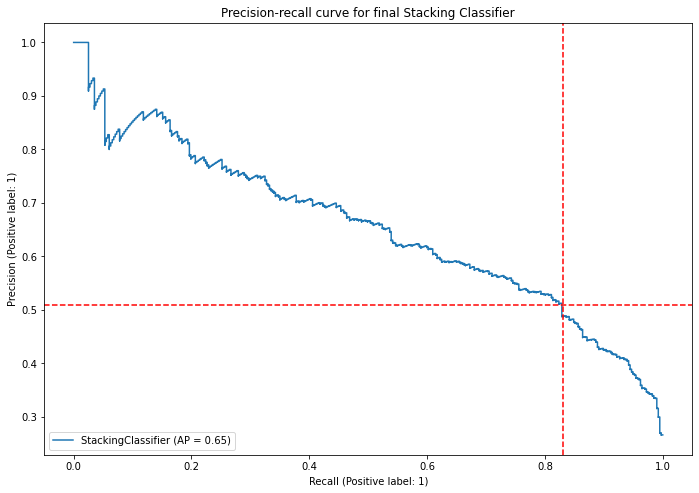

In [158]:
plot_precision_recall_curve(final_stacking, X_test, y_test, ax=plt.axes((0,0,1.5,1.5)))
plt.axhline(0.51, ls='--', color = 'r')
plt.axvline(0.83, ls='--', color = 'r')
plt.title('Precision-recall curve for final Stacking Classifier')
plt.show()

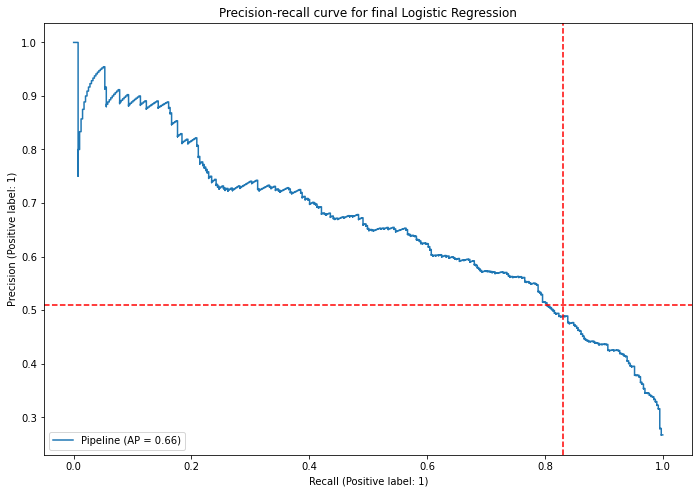

In [159]:
plot_precision_recall_curve(final_lr, X_test, y_test, ax=plt.axes((0,0,1.5,1.5)))
plt.axhline(0.51, ls='--', color = 'r')
plt.axvline(0.83, ls='--', color = 'r')
plt.title('Precision-recall curve for final Logistic Regression')
plt.show()

## **Выводы**
- Удалось улучшить метрики всех моделей
- Лучший результат среди отдельных моделей показала логистическая регрессия. При сохранении precision 0.45 recall удалось поднять до 0.788
- Стэкинг позволяет усреднить значения, и итоговый результат по roc-auc лишь слегка меньше результата лучшей из моделей. При этом, если смотреть precision-recall curve - видно, что настраивая порог уверенности алгоритма можно добиться большего recall чем у логистической регрессии, при сохранении precision на уровне выше 0.5

# 5. Блок для проверки моделей с новыми тестовыми данными или для обучения на новых данных с последующей проверкой

### Запишите сюда путь к нужному файлу, если необходимо обучить модели на новых данных

In [163]:
data_new = pd.read_csv('telecom_users.csv')

In [164]:
# Чтобы во всех функциях, где используются генераторы псевдослучайных чисел у нас были одинаковые значения random_state
# заведем переменную RANDOM_STATE 
RANDOM_STATE = 42

# К сожалению в общем случае (если не считать TransformedTragetRegression) sklearn не умеет на ходу,
# внутри пайплайна кодировать целевую переменную. Так что прийдётся делать это заранее.
X_new = data_new.drop('Churn', axis=1)
y_new = data_new['Churn'].map({'Yes': 1, 'No': 0}).values

# Разделим выборку на тренировочную и тестовую части.
# Поскольку выборка несбалансирована, будем использовать стратификацию по y.
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, stratify=y_new, random_state=RANDOM_STATE)

# Создадим списки категориальных и чисовых переменных. Для использования в ColumnTransformer
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = [name for name in X_new.columns.to_list()[2:] if name not in num_features]
print('num_features:', num_features)
print('cat_features:', cat_features)

# Создадим сплиттер для кросс-валидации при подборе гиперпараметров и для стэкинга.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

num_features: ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [165]:
# Итоговые параметры для каждой модели
# Логистическая регрессия
final_lr_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': HasInternetTransformer(),
      'prep_and_fe__engineering__tenure_bin': TenureBinTransformer(),
      'select__k': 17,
      'sampling': SMOTE(random_state=RANDOM_STATE),
      'classif__penalty': 'l1',
      'classif__C': 0.7,
      'classif__solver': 'liblinear',      
}

# К-ближайших соседей
final_knn_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': 'drop',
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 7,
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__n_neighbors': 9,
      'classif__algorithm': 'ball_tree',
      'classif__weights': 'uniform',      
}

# Решающие деревья
final_dtc_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': 'drop',
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': 'drop',
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 3,
      'sampling': SMOTE(random_state=RANDOM_STATE),
      'classif__criterion': 'gini',
      'classif__splitter': 'best',
      'classif__max_features': 'sqrt',
      'classif__min_samples_leaf': 251,

}

# Случайный лес
final_rfc_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OrdinalEncoder(),
      'prep_and_fe__engineering__service_count': 'drop',
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': TenureBinTransformer(),
      'select__k': 'all',
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__n_estimators': 100,
      'classif__criterion': 'entropy',
      'classif__max_features': 'sqrt',
      'classif__min_samples_leaf': 11,

}

# Метод опорных векторов
final_svc_params = {
      'prep_and_fe__prep__num__scale': StandardScaler(),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': HasInternetTransformer(),
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 'all',
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__C': 0.6,
      'classif__kernel': 'linear'
}

# Байесовский классификатор
# Тут параметры только для препроцессинга подбираем,
# поэтому в данном случае просто прогоним один fit при заданном препроцессинге.
final_nb_params = {
      'prep_and_fe__prep__num__scale': PowerTransformer(method='yeo-johnson'),
      'prep_and_fe__prep__total_ch': 'drop',
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': HasInternetTransformer(),
      'prep_and_fe__engineering__tenure_bin': TenureBinTransformer(),
      'select__k': 10,
      'sampling': SMOTEENN(random_state=RANDOM_STATE)
}


# Градиентный бустинг
final_xgb_params = {
      'prep_and_fe__prep__num__scale': StandardScaler(),
      'prep_and_fe__prep__total_ch': total_charges_prep,
      'prep_and_fe__prep__cat__encoding': OneHotEncoder(drop='if_binary'),
      'prep_and_fe__engineering__service_count': ServiceCountTransformer(),
      'prep_and_fe__engineering__hasInternet': 'drop',
      'prep_and_fe__engineering__tenure_bin': 'drop',
      'select__k': 'all',
      'sampling': SMOTEENN(random_state=RANDOM_STATE),
      'classif__n_estimators': 100,
      'classif__learning_rate': 0.1
}

# Стэкинг
final_stacking_params = {'final_estimator__C': 0.30000000000000004, 
                         'final_estimator__penalty': 'l2',
                         'final_estimator__solver': 'lbfgs'}

In [167]:
## Все модели:
# Логистическая регрессия
lr_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', LogisticRegression(random_state=RANDOM_STATE, max_iter=200,
                                                       class_weight='balanced', n_jobs=-1))
                        ])

# К-ближайших соседей
knn_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', KNeighborsClassifier(n_jobs=-1))
                        ])

# Решающие деревья
dtc_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'))
                        ])

# Случайный лес
rfc_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced'))
                        ])

# Метод опорных векторов
svc_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', SVC(random_state=RANDOM_STATE, class_weight='balanced'))
                        ])

# Байесовский классификатор
nb_pipe = test_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', GaussianNB())
                        ])

# Градиентный бустинг
xgb_pipe = imbPipeline([
                        ('prep_and_fe', full_preprocessing),
                        ('sampling', SMOTE()),
                        ('select', SelectKBest(score_func=mutual_info_classif)),
                        ('classif', XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1))
                        ])

final_lr = lr_pipe.set_params(**final_lr_params)
final_knn = knn_pipe.set_params(**final_knn_params)
final_dtc = dtc_pipe.set_params(**final_dtc_params)
final_rfc = rfc_pipe.set_params(**final_rfc_params)
final_svc = svc_pipe.set_params(**final_svc_params)
final_nb = nb_pipe.set_params(**final_nb_params)
final_xgb = xgb_pipe.set_params(**final_xgb_params)

# Стэкинг
stacking_list = [('lr',final_lr), ('knn',final_knn), ('dtc',final_dtc),
                  ('rfc',final_rfc), ('svc', final_svc), ('nb', final_nb),
                  ('xgb', final_xgb)]

stacking_model = StackingClassifier(estimators=stacking_list,
                                    final_estimator = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1),
                                    cv=skf, n_jobs=-1)

final_stacking = stacking_model.set_params(**final_stacking_params)

In [169]:
final_scoring_list = [final_lr, final_knn, final_dtc, final_rfc, final_svc, final_nb, final_xgb, final_stacking]
new_test_scores = pd.DataFrame()
for model in final_scoring_list:
    model.fit(X_train, y_train)
    new_test_scores = new_test_scores.append(model_score(model, X_test, y_test))
print('Результаты на новых данных')
new_test_scores

[22:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Результаты на новых данных
